## 🔎 Exploratory analysis of the [Fake-News-Detection-dataset](https://huggingface.co/datasets/Pulk17/Fake-News-Detection-dataset)

In this notebook, we will perform an exploratory analysis of the [Fake-News-Detection-dataset](https://huggingface.co/datasets/Pulk17/Fake-News-Detection-dataset) dataset. It contains news articles labeled as either fake (0) or real (1), which can be useful for training LLMs to detect fake news.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hf://datasets/Pulk17/Fake-News-Detection-dataset/train.tsv", sep="\t")

KeyboardInterrupt: 

### 🧾 Information about the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


### 📃 Columns description in the dataset
- `Unnamed: 0`: Unique identifier for each news article.
- `title`: The headline or title of the news article.
- `author`: The author of the news article.
- `text`: The main content of the news article.
- `label`: The label indicating whether the article is real or fake.

For an easier readability, we will rename some columns which are not easily comprehensible. 
- For example, the column ```Unnamed: 0``` will be renamed to ```id```.
- The column ```label``` will be renamed to ```is_fake_news```.
- Values in the column ```is_fake_news``` will be renamed from 0 and 1 to ```True (is a fake news)``` and ```False (is a real news)``` respectively.

In [3]:
df = df.rename(columns={"Unnamed: 0": "id"})
df = df.rename(columns={"label": "is_fake_news"})
df["is_fake_news"] = df["is_fake_news"].map({0: True, 1: False})
df.head(5)

,id,title,text,subject,date,is_fake_news
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",False
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",True
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",False
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",True
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",True


In order to have a clear vision of the column type, we will parse each `Dtype` field with a type more specific. The new type will be coherent with the information provided.

In [4]:
df['id'] = df['id'].convert_dtypes(convert_integer=True)
df['title'] = df['title'].convert_dtypes(convert_string=True)
df['text'] = df['text'].convert_dtypes(convert_string=True)
df['subject'] = df['subject'].convert_dtypes(convert_string=True)

df['date'] = df['date'].convert_dtypes(convert_string=True)

df['is_fake_news'] = df['is_fake_news'].convert_dtypes(convert_boolean=True)

df.info()

df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30000 non-null  Int64  
 1   title         30000 non-null  string 
 2   text          30000 non-null  string 
 3   subject       30000 non-null  string 
 4   date          30000 non-null  string 
 5   is_fake_news  30000 non-null  boolean
dtypes: Int64(1), boolean(1), string(4)
memory usage: 1.2 MB


,id,title,text,subject,date,is_fake_news
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",False
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",True
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",False
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",True
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",True


### 🧾 Size of the dataset (rows and columns)

In [5]:
print("Number of records:", len(df))
print("Number of columns:", len(df.columns))

Number of records: 30000
Number of columns: 6


### 📃 Statistics
We provide some statistics about the dataset such as:
- Comparison of the number of real news articles and fake news articles.
- Distribution of the length of news articles (in terms of number of words).

Following graph shows the distribution of real and fake news articles in the dataset.

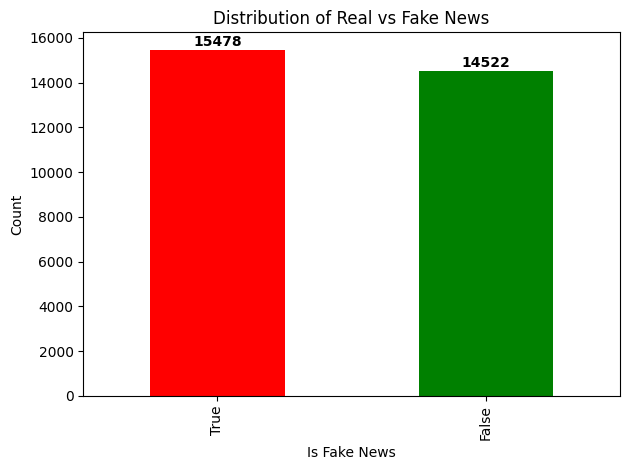

Percentage of Real News: 48.41%
Percentage of Fake News: 51.59%


In [6]:
import matplotlib.pyplot as plt

ax = df["is_fake_news"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Is Fake News")
plt.ylabel("Count")

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # type: ignore
        p.get_height() + 50, # type: ignore
        f"{int(p.get_height())}", # type: ignore
        ha="center",
        va="bottom",   
        fontsize=10,
        fontweight="bold",
        color="black"
    )

plt.tight_layout()
plt.show()

# Calcola le percentuali
news = df["is_fake_news"].value_counts(normalize=True) * 100
print(f"Percentage of Real News: {news[False]:.2f}%")
print(f"Percentage of Fake News: {news[True]:.2f}%")


As we can see, the dataset is balanced with a nearly equal number of real and fake news articles.
<br>  
Next graph shows the distribution of the length of news articles (in terms of number of words).

Maximum article length (in words): 8435
Minimum article length (in words): 1
Average article length (in words): 418.2631


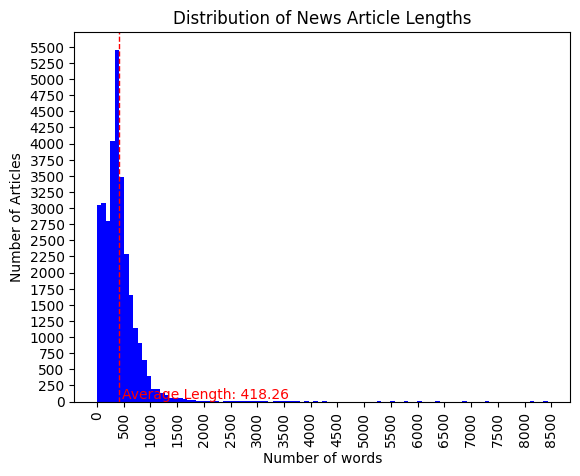

In [7]:

NUM_WORDS = "Number of words"
NUM_ARTICLES = "Number of Articles"

def df_text_length():
    return df['text'].apply(
        lambda x: (len(str(x)) - len(str(x).replace(' ', '')) + 1)
        if isinstance(x, str) and str(x).strip() != '' else 0
    )

df['text_length'] = df_text_length()

most_length_article = df['text_length'].max()
print(f"Maximum article length (in words): {most_length_article}")

less_length_article = df['text_length'].min()
print(f"Minimum article length (in words): {less_length_article}")

avg_length_article = df['text_length'].mean()
print(f"Average article length (in words): {avg_length_article}")

def create_histogram(ds):
    plt.hist(ds, bins=100, color='blue')
    plt.title("Distribution of News Article Lengths")
    plt.xlabel(NUM_WORDS)
    plt.ylabel(NUM_ARTICLES)
    plt.locator_params(axis='x', nbins=35)
    plt.xticks(rotation=90)
    plt.locator_params(axis='y', nbins=25)
    plt.axvline(avg_length_article, color='red', linestyle='dashed', linewidth=1)
    plt.text(avg_length_article + 50, 50, f'Average Length: {avg_length_article:.2f}', color='red')
    plt.show()

create_histogram(df['text_length'])

- Many articles in the dataset have a length around 500 words. 
- Only a few have more than 1500 words, reaching up to nearly 8000/8500 words.
- There are also many articles with very few words, even one single word.

We will now show how these articles are distributed between real and fake news articles, showing the text length of both categories. We will use two different histograms for that.

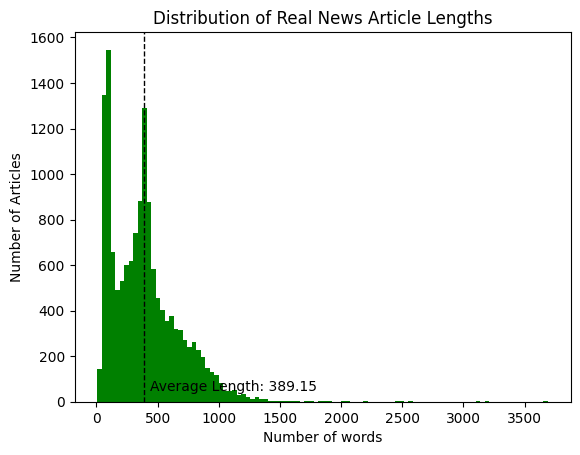

Article with max length (real news):  3692
Article with min length (real news):  5


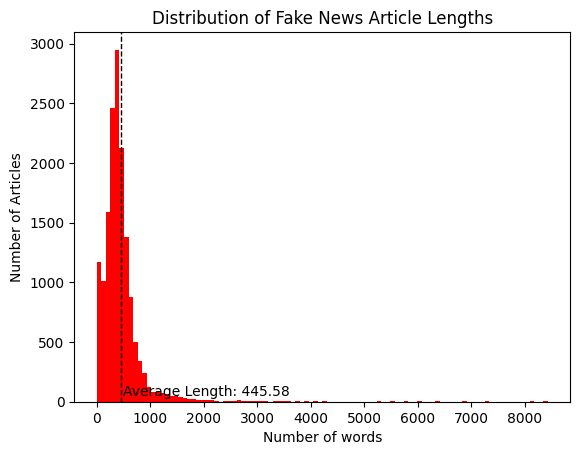

Article with max length (fake news):  8435
Article with min length (fake news):  1


In [8]:
news = df["is_fake_news"].value_counts(normalize=True) * 100

true_news = df[df["is_fake_news"] == False]
avg_length_article = true_news['text_length'].mean()


true_hist = plt.hist(true_news['text_length'], bins=100, color='green', label='Real News')
true_hist = plt.xlabel(NUM_WORDS)
true_hist = plt.ylabel(NUM_ARTICLES)
true_hist = plt.locator_params(axis='x', nbins=10)
true_hist = plt.title("Distribution of Real News Article Lengths")
true_hist = plt.text(avg_length_article + 50, 50, f'Average Length: {avg_length_article:.2f}', color='black')
true_hist = plt.axvline(avg_length_article, color='black', linestyle='dashed', linewidth=1)
true_hist = plt.show()

print("Article with max length (real news): ", true_news['text_length'].max())
print("Article with min length (real news): ", true_news['text_length'].min())

fake_news = df[df["is_fake_news"] == True]
avg_length_article = fake_news['text_length'].mean()
fake_hist = plt.hist(fake_news['text_length'], bins=100, color='red', label='Fake News')
fake_hist = plt.xlabel(NUM_WORDS)
fake_hist = plt.ylabel(NUM_ARTICLES)
fake_hist = plt.locator_params(axis='x', nbins=10)
fake_hist = plt.title("Distribution of Fake News Article Lengths")
fake_hist = plt.text(avg_length_article + 50, 50, f'Average Length: {avg_length_article:.2f}', color='black')
fake_hist = plt.axvline(avg_length_article, color='black', linestyle='dashed', linewidth=1)
fake_hist = plt.show()

print("Article with max length (fake news): ", fake_news['text_length'].max())
print("Article with min length (fake news): ", fake_news['text_length'].min())



### 🧾 Check for duplicate rows

We will now check if there are duplicate rows in the dataset. We will exclude the `id` from this check, as long is an unique identifier for each entry.

In [9]:
duplicate_row_df = df[df.duplicated(subset=df.columns.difference(['id']))]
print("Number of duplicate rows:", duplicate_row_df.shape[0])

Number of duplicate rows: 92


The dataset contains 92 duplicate rows.

### 🧾 Check for missing values in the dataset

Let's check if there are any missing values in the dataset.

In [10]:
print(df.isnull().sum())

id              0
title           0
text            0
subject         0
date            0
is_fake_news    0
text_length     0
dtype: int64


No missing values were found in the dataset.

### 🧾 Subject of the articles
We can check the subject of the articles in the dataset, in order to see which topics cover the dataset.

Text(0.5, 1.0, 'Distribution of Article Subjects')

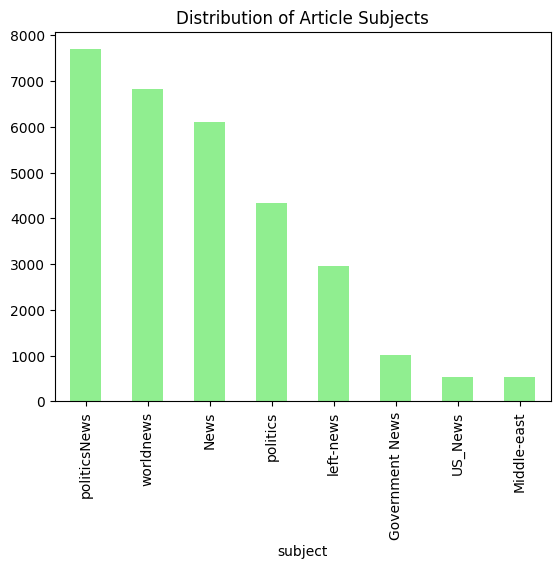

In [11]:
import matplotlib.pyplot as plt

df["subject"].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Distribution of Article Subjects")

Most of the articles in the dataset are about politics.

### 🧾 Conclusion and main outcomes
In this notebook, we have explored the Fake-News-Detection-dataset. We have achieved the following outcomes:
- The dataset is very big, containing exactly 30k articles.
- The dataset is quite balanced, with 15.478 fake news vs 14.522 real news articles. 
- The dataset contains 92 duplicate rows.
- The average length of articles is almost 417 words, with the longest article containing 8.435 words and the shortest one containing only 1 word.
- The majority of articles are about politics.

The next step is to pre-process the dataset in order to prepare it for training and evaluation of the chatbots 🤖.